In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pandas as pd
from scipy import spatial
from datetime import datetime
from datetime import timedelta

In [227]:
### MOSAiC Summer School
# Code by Thomas Rackow (AWI, YOPP) for 'climatological' sea ice buoy forecasts.
# Extend to a real forecast by using whatever U,V forecasts will be available on the ship.
# (c) 2019

In [228]:
# based on Thomas K. favourites; 1) Low Resolution Sea Ice Drift
# ftp://osisaf.met.no/archive/ice/drift_lr/

In [229]:
# and 2) AMSR-2 Global Sea Ice Concentration
# ftp://osisaf.met.no/prod/ice/conc_amsr/

### download data: sea ice drift velocities and concentration

In [191]:
# download latest drift velocities into folder 'drift-velocities'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P drift-velocities ftp://osisaf.met.no/archive/ice/drift_lr/merged/

2019-09-07 18:20:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/ [801] -> "drift-velocities-new/archive/ice/drift_lr/merged/.listing" [1]
2019-09-07 18:20:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/ [179] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/.listing" [1]
2019-09-07 18:20:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ [3023] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/.listing" [1]
2019-09-07 18:20:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc" [1]
2019-09-07 18:20:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912071200-200912091200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-o

2019-09-07 18:20:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc" [1]
2019-09-07 18:20:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc" [1]
2019-09-07 18:20:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc" [1]
2019-09-07 18:20:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001051200-201001071200.nc [72

2019-09-07 18:21:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc" [1]
2019-09-07 18:21:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc" [1]
2019-09-07 18:21:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc" [1]
2019-09-07 18:21:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002031200-201002051200.nc [72

2019-09-07 18:21:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc" [1]
2019-09-07 18:21:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc" [1]
2019-09-07 18:21:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc" [1]
2019-09-07 18:21:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003041200-201003061200.nc [72

2019-09-07 18:22:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ [3749] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/.listing" [1]
2019-09-07 18:22:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc" [1]
2019-09-07 18:22:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc" [1]
2019-09-07 18:22:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-201004031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-20100

2019-09-07 18:22:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004281200-201004301200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004281200-201004301200.nc" [1]
2019-09-07 18:22:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ [3870] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/.listing" [1]
2019-09-07 18:22:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc" [1]
2019-09-07 18:22:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-201005021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-20100

In [22]:
# download sea ice concentration into folder 'seaice-concentration'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P seaice-concentration ftp://osisaf.met.no/prod/ice/conc_amsr/

2019-07-12 14:12:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ [14111] -> "seaice-concentration/prod/ice/conc_amsr/.listing" [1]
2019-07-12 14:12:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc" [1]
2019-07-12 14:13:02 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc" [1]
2019-07-12 14:13:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc" [1]
2019-07-12 14:13:35 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906121200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-

2019-07-12 17:46:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc" [1]
2019-07-12 17:46:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc" [1]
2019-07-12 17:46:46 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc" [1]
2019-07-12 17:46:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc" [1]
2019-07-12 17:47:04 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906161200.nc [20450448] -> "se

2019-07-12 17:53:31 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc" [1]
2019-07-12 17:53:38 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc" [1]
2019-07-12 17:53:45 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc" [1]
2019-07-12 17:53:53 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc" [1]
2019-07-12 17:54:00 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-t

2019-07-12 17:57:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc" [1]
2019-07-12 17:58:03 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc" [1]
2019-07-12 17:58:10 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc" [1]
2019-07-12 17:58:17 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc" [1]
2019-07-12 17:58:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906251200.nc [15756368] -> "se

In [184]:
ls drift-velocities/archive/ice/drift_lr/merged/

2009/ 2010/ 2011/ 2012/ 2013/ 2014/ 2015/ 2016/ 2017/ 2018/ 2019/


In [4]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

### look at the data

In [138]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

In [197]:
# load an example file
OSISAFfile = 'drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc'
fl = Dataset(OSISAFfile)
#xc=fl.variables['xc']
#yc=fl.variables['yc']
#XC,YC=np.meshgrid(xc,yc)

In [198]:
# lon lat on grid
lon_start=np.copy(fl.variables['lon'])
lat_start=np.copy(fl.variables['lat'])

# lon lat at the end of the displacement
lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
lat_end=np.squeeze(fl.variables['lat1'][0,:,:])

In [199]:
lon_end.min(), lon_end.max(), lon_start.min(), lon_start.max()

(-179.70926, 179.05727, -180.0, 179.52649)

In [200]:
r_earth=6.3675*10**6 # radius of Earth in [m]
rad=np.pi/180.0 # radiant <-> degree

def length_of_latitude_circle(lat=85.):
    return 2*np.pi*r_earth*np.cos(lat*rad) / 1000. # km

In [230]:
# Construct U,V sea ice velocity here for plotting
deltalon=lon_end-lon_start
deltalon[deltalon>100.]=deltalon[deltalon>100.]-360. # jump at -180..180
deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. * 3.6 # km/h -> m/s
Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. * 3.6 #km/h -> m/s
plotfield=np.squeeze(np.sqrt(Ufield**2 + Vfield**2)) # m/s
#plotfield=Ufield

/Users/trackow/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


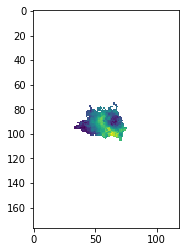

In [231]:
np.size(plotfield)
plt.imshow(plotfield)
plt.show()

#### add geographic information with Basemap

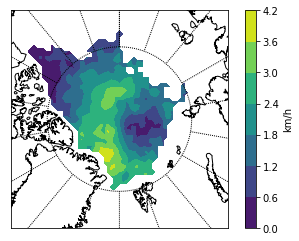

In [232]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

### Compute forward trajectories; class Buoys

In [204]:
class Buoys:
    
    global rad, r_earth
    rad=np.pi/180.0 # radiant <-> degree
    r_earth=6.3675*10**6 # radius of Earth in [m]
    
    def __init__(self, lon_start, lat_start, earliest_date_of_buoy):
        self.oldlon = lon_start*rad
        self.oldlat = lat_start*rad
        self.lon = lon_start*rad
        self.lat = lat_start*rad
        self.old_u = np.zeros(lon_start.shape)
        self.old_v = np.zeros(lon_start.shape)
        self.date = datetime.strptime(earliest_date_of_buoy, "%Y-%m-%d %H:%M:%S")
        self.delta_x = np.zeros(lon_start.shape)
        self.delta_y = np.zeros(lon_start.shape)
        self.u_ice = np.zeros(lon_start.shape)
        self.v_ice = np.zeros(lon_start.shape)
        
    def getdate(self):
        return self.date.strftime("%Y-%m-%d %H:%M:%S")
        
    def trajectory(self, new_u,new_v, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        #save old position in case the drifter leaves the domain
        self.oldlon = self.lon # radiant
        self.oldlat = self.lat # radiant
        
        #displacement vectors
        deltax1 = self.old_u * delta_t
        deltay1 = self.old_v * delta_t
        deltax2 = new_u * delta_t
        deltay2 = new_v * delta_t
        
        #Heun method (2nd order)
        self.lon = self.lon + (0.5*(deltax1 + deltax2) / (r_earth*np.cos(self.lat)) )
        self.lat = self.lat + (0.5*(deltay1 + deltay2) /  r_earth )
        
        # keep degree in range 0..360 and -90..90
        lon_deg=self.lon/rad % 360
        lat_deg=np.clip(self.lat/rad, -90., 90.)
        self.lon = lon_deg*rad
        self.lat = lat_deg*rad
        
        #update velocity here (old value was needed for heun method)
        self.old_u=new_u
        self.old_v=new_v
        
        # update time stamp
        self.date = self.date + timedelta(seconds=delta_t)

        return lon_deg, lat_deg

In [205]:
def loaddate_ofOSISAF(datestring, hemisphere='nh'):
    
    # convert datestring to datetime object
    thedate = datetime.strptime(datestring, "%Y-%m-%d %H:%M:%S")
    
    # let's construct the file name, 
    # e.g. drift-velocities/archive/ice/drift_lr/merged/2019/09/
    # ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc
    pathtofile="drift-velocities/archive/ice/drift_lr/merged/"
    # middle part
    middlefilename="ice_drift_"+hemisphere+"_polstere-625_multi-oi_"
    # e.g. 201907291200-201907311200 (48hr span)
    enddate=thedate + timedelta(days=2)
    # YYYY/MM/ (from end date)
    YYYYMM=enddate.strftime("%Y")+"/"+enddate.strftime("%m")+"/"
    endfilename= thedate.strftime("%Y%m%d%H%M") + "-" + enddate.strftime("%Y%m%d%H%M") + '.nc'
    
    # the OSISAF file to be loaded
    filename=pathtofile + YYYYMM + middlefilename + endfilename
    print "loading "+filename+ " ..."
    
    # load the file
    fl = Dataset(filename)
    #xc=fl.variables['xc']
    #yc=fl.variables['yc']
    #XC,YC=np.meshgrid(xc,yc)
    
    # lon lat on grid
    lon_start=np.copy(fl.variables['lon'])
    lat_start=np.copy(fl.variables['lat'])

    # lon lat at the end of the displacement
    lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
    lat_end=np.squeeze(fl.variables['lat1'][0,:,:])
    
    # close the file
    fl.close()
    
    # compute Ufield from end points and start points (48hour change)
    deltalon=lon_end-lon_start
    deltalon[deltalon>100.]=deltalon[deltalon>100.]-360.   # jump at -180..180
    deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
    Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. / 3.6 # km/h -> m/s
    
    # compute Vfield as well
    Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. / 3.6 #km/h -> m/s
    
    return Ufield, Vfield

In [206]:
# test
datestring='2019-09-01 12:00:00'
Ufield, Vfield = loaddate_ofOSISAF(datestring, hemisphere='nh')

loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc ...


In [209]:
def find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; in the trajectory code its 0..360
    lon_adjust=objects.lon/rad
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,objects.lat/rad)) 
    # fast KDTree nearest neighbor method
    idx=spatial.KDTree(A).query(tuples)[1]
    
    return Ufield[idx], Vfield[idx]

In [210]:
def find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; poslon is 0..360
    lon_adjust=poslon
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,poslat)) 
    
    # fast KDTree nearest neighbor method
    return spatial.KDTree(A).query(tuples)[1]

### Generate DataFrame of buoy positions and dates

In [211]:
# pick some locations here
poslon=np.array([160.,157.,163.,160.,157.,163.,82.,88.,80.])
poslat=np.array([84.,84.,85.,83.,83.,83.,84.,87.,88.])
# find the closest point on OSISAF grid
idx=find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat)

# starting points (black)
test_startlo=lon_start[:,:].flatten()[idx]
test_startla=lat_start[:,:].flatten()[idx]

# end points (yellow)
test_endlo=lon_end[:,:].flatten()[idx]
test_endla=lat_end[:,:].flatten()[idx]

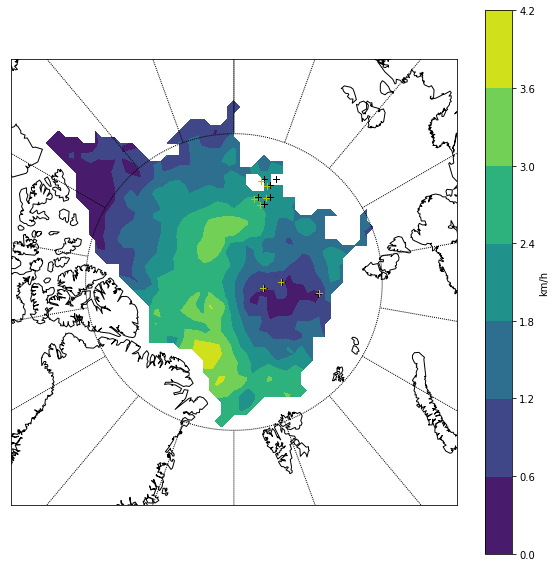

In [212]:
# plot start and end points

fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    lon_map,lat_map=m(test_endlo,test_endla)
    m.plot(lon_map,lat_map,'y+')

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

#### do the actual computation

In [239]:
# how many days until the forcing runs out?

# convert datestring to datetime object
initialdate='2018-10-01 12:00:00'
#initialdate='2013-10-01 12:00:00'
thedate = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")

endofforcing='2019-09-04 12:00:00'
endoftime = datetime.strptime(endofforcing, "%Y-%m-%d %H:%M:%S")

delta=endoftime - thedate
delta.days

338

In [241]:
# config
initialdate='2018-10-01 12:00:00'
num_times=delta.days+1   # integrate for x ...
delta_t=86400 # ... days [seconds]
num_buoys=test_startlo.shape[0]


# generate DataFrame that will be filled with positions
dates = [initialdate]
lons = np.zeros((1, num_buoys))
lats = np.zeros((1, num_buoys)) 
lons_df = pd.DataFrame(data=lons, index=dates)
lats_df = pd.DataFrame(data=lats, index=dates)

# set initial positions at initial date, 0..360, 0..90
lons_df.loc[initialdate] = test_startlo # np.arange(90.,110.,1.)
lats_df.loc[initialdate] = test_startla # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8
2018-10-01 12:00:00,158.962494,156.801407,164.054611,159.443954,157.619858,163.610458,81.869896,90.0,78.690071


In [242]:
# initialize the objects
objects = Buoys(lons_df.loc[initialdate],lats_df.loc[initialdate],initialdate)

In [243]:
# integrate objects forward in time
for i in np.arange(0,num_times):
    print 'This is loop #'+str(i)
    
    # test with constant U,V
    #LON,LAT=objects.trajectory(-1./3.6,0.0,delta_t=86400) # U,V in m/s; 1000/3600 is 1km/h
    
    # get sea ice velocity fields from data
    Ufield, Vfield = loaddate_ofOSISAF(objects.getdate(), hemisphere='nh')

    # evaluate velocity fields at buoy position (NN, could be interpolated as well)
    U,V=find_UV_atbuoy_pos(lon_start,lat_start, Ufield.flatten(),Vfield.flatten(), objects)
    
    # don't advect buoys when there is no ice
    fixed=np.logical_or(U.mask, V.mask)
    U[fixed]=0.
    V[fixed]=0.
    
    # advect buoys
    LON,LAT=objects.trajectory(U,V,delta_t=delta_t) # U,V in m/s, delta_t in seconds
    
    # append the date and the positions to data frame
    lons_df=lons_df.append(LON.rename(objects.getdate())) # ADD CURRENT TIME HERE
    lats_df=lats_df.append(LAT.rename(objects.getdate()))

This is loop #0
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810011200-201810031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #1
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810021200-201810041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #2
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810031200-201810051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #3
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810041200-201810061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #4
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810051200-201810071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #5
loading drift-

Update buoy positions. Integrate for 24.0 hours.
This is loop #43
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811131200-201811151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #44
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811141200-201811161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #45
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811151200-201811171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #46
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811161200-201811181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #47
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811171200-201811191200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #87
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812271200-201812291200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #88
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812281200-201812301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #89
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812291200-201812311200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #90
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201812301200-201901011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #91
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201812311200-201901021200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #129
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902071200-201902091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #130
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902081200-201902101200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #131
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902091200-201902111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #132
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902101200-201902121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #133
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902111200-201902131200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #173
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903231200-201903251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #174
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903241200-201903261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #175
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903251200-201903271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #176
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903261200-201903281200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #177
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903271200-201903291200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #215
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905041200-201905061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #216
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905051200-201905071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #217
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905061200-201905081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #218
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905071200-201905091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #219
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905081200-201905101200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #259
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906171200-201906191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #260
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906181200-201906201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #261
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906191200-201906211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #262
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906201200-201906221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #263
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906211200-201906231200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #302
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201907301200-201908011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #303
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201907311200-201908021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #304
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908011200-201908031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #305
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908021200-201908041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #306
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908031200-201908051200.nc ...
Update buoy position

#### plot the trajectories 

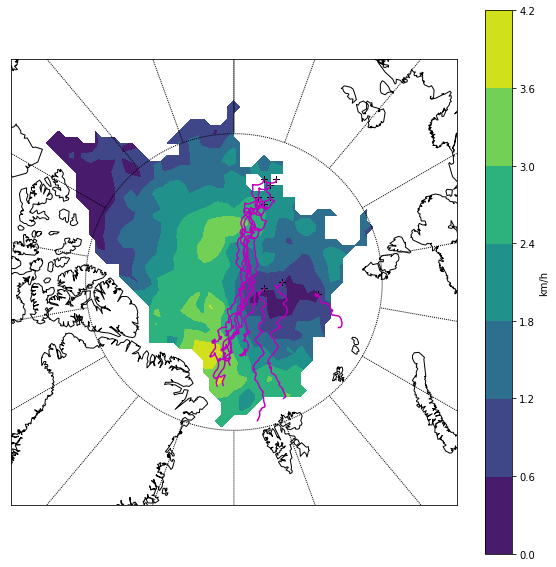

In [233]:
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

# STARTING TEST POINTS
for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    # END TEST POINTS (as given in OSISAF data)
    #lon_map,lat_map=m(test_endlo,test_endla)
    #m.plot(lon_map,lat_map,'y+')
    
# COMPUTED TRAJECTORY FROM Uice Vice
for buoynum in np.arange(0,num_buoys):
    lon_traj,lat_traj=m(lons_df[buoynum][:].values,lats_df[buoynum][:].values)
    m.plot(lon_traj, lat_traj,'m')
    

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

### export to SIDFEx format 

##### example header:

In [ ]:
SubmitYear: 2019
SubmitDayOfYear: 136.362
ProcessedYear: 2019
ProcessedDayOfYear: 136.375
### end of auto header
GroupID: awi001
MethodID: ClimRunVers2019May
TargetID: 300234066830700
InitYear: 2019
InitDayOfYear: 90
InitLat: 73.63310
InitLon: -8.17290
EnsMemNum: 010
### end of header
Year DayOfYear Lat Lon
2019  90  73.63310  -8.17290

##### fake a header for our trajectories

In [340]:
# CONTRIBUTION DETAILS
GroupID='mss001' # MOSAiC Summer School
MethodID='HistRunMOSAiCAnalogs'
TargetID=0 # will use this as column index in lons_df so far
EnsMemNum=1

# initial time of the trajectory
initialtime_traj=datetime.strptime(lons_df[0].index[0], "%Y-%m-%d %H:%M:%S")
InitYear=initialtime_traj.year

# initial day of the trajectory (counted from beginning of the year)
begin_initializedyear=str(InitYear)+'-01-01 00:00:00'
# difference in fractional days
delta=initialtime_traj - datetime.strptime(begin_initializedyear, "%Y-%m-%d %H:%M:%S")
#fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
InitDayOfYear=delta.days

# intial position
InitLat=np.round(lats_df[TargetID][0],5)
InitLon=np.round(lons_df[TargetID][0],5)

# SUBMISSION DETAILS
# beginning of this year
initialdate='2019-01-01 00:00:00'
yearbegin = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")
# current time
now=datetime.now()
# difference in fractional days
delta=now - yearbegin
fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()

# create the header of SIDFEx format
SubmitYear=now.year
SubmitDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)
ProcessedYear=now.year
ProcessedDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)

# fake auto header (usually done on DKRZ cloud)
autoheader= "SubmitYear: "+str(SubmitYear)+ \
        "\nSubmitDayOfYear: "+str(SubmitDayOfYear)+ \
        "\nProcessedYear: "+str(ProcessedYear)+ \
        "\nProcessedDayOfYear: "+str(ProcessedDayOfYear)+ \
        "\n### end of auto header"

#print autoheader

# main header
mainheader= "\nGroupID: "+GroupID+ \
        "\nMethodID: "+MethodID+ \
        "\nTargetID: "+str(TargetID)+ \
        "\nInitYear: "+str(InitYear)+ \
        "\nInitDayOfYear: "+str(InitDayOfYear)+ \
        "\nInitLat: "+str(InitLat)+ \
        "\nInitLon: "+str(InitLon)+ \
        "\nEnsMemNum: "+str(EnsMemNum).zfill(3)+ \
        "\n### end of header"
        

# Year DayOfYear Lat Lon
# 2019  90  73.63310  -8.17290
header=autoheader+mainheader+"\nYear DayOfYear Lat Lon"

print header

# main data here

# initialize X
length=lons_df[TargetID].values.shape[0]
X=np.zeros((length,4))

# fill with positions
X[:,2]=np.round(lats_df[TargetID].values,5)
X[:,3]=np.round(lons_df[TargetID].values,5)

# fill X with date information
for i,val in enumerate(lons_df[0].index.tolist()):
    
    # fill X with year information
    date=datetime.strptime(val, "%Y-%m-%d %H:%M:%S")
    X[i,0]=date.year
    
    # fill X with day of year information
    delta=date - datetime.strptime(begin_initializedyear, "%Y-%m-%d %H:%M:%S")
    #fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
    X[i,1]=delta.days
    
print X[0,:]

# save the file
np.savetxt('mss001.txt',X, header=header, fmt='%i  %i  %f  %f', comments='')

SubmitYear: 2019
SubmitDayOfYear: 250.677
ProcessedYear: 2019
ProcessedDayOfYear: 250.677
### end of auto header
GroupID: mss001
MethodID: HistRunMOSAiCAnalogs
TargetID: 0
InitYear: 2018
InitDayOfYear: 273
InitLat: 84.32224
InitLon: 158.96249
EnsMemNum: 001
### end of header
Year DayOfYear Lat Lon
[2018.       273.        84.32224  158.96249]


In [ ]:
SubmitYear: 2019
SubmitDayOfYear: 136.362
ProcessedYear: 2019
ProcessedDayOfYear: 136.375
### end of auto header
GroupID: awi001
MethodID: ClimRunVers2019May
TargetID: 300234066830700
InitYear: 2019
InitDayOfYear: 90
InitLat: 73.63310
InitLon: -8.17290
EnsMemNum: 010
### end of header
Year DayOfYear Lat Lon
2019  90  73.63310  -8.17290

In [342]:
less mss001.txt

In [343]:
pwd

u'/Users/trackow/Documents/MOSAiC-Lecture/MOSAiC-School-ensemble'

- Parallel computing, sea ice age maps, Durchmischung, leads, Alleinstellungsmerkmal
- MOSAIC school ensemble machen fuer SiDFex?
- DWD forecast available, at ship position, get a file